# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [2]:
import pandas as pd

## imports for Python, Pandas

In [19]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as pt

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [5]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [6]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [7]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Question 1 Solution:

In [23]:
#question1:

json_df = pd.read_json('data/world_bank_projects.json')
#we take a look at the data:


json_df.info()
#we note that the table has 500 entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [32]:
#we check that each entry(project) has a unique id (by looking at the id column:
len(json_df['id'].unique())
#since the above returns 500, each id serves as a unique identifier to each entry.

500

In [39]:
#we check that countrynames column has appropriate data:
print(json_df['countryname'].unique())
#we see that we get an array of strings. which is appropriate.

['Federal Democratic Republic of Ethiopia' 'Republic of Tunisia' 'Tuvalu'
 'Republic of Yemen' 'Kingdom of Lesotho' 'Republic of Kenya'
 'Republic of India' "People's Republic of China" 'Kingdom of Morocco'
 'Republic of South Sudan' 'Republic of Ghana'
 'Democratic Republic of Timor-Leste' 'Hashemite Kingdom of Jordan'
 'Samoa' 'Republic of Madagascar' 'Kingdom of Cambodia' 'Kyrgyz Republic'
 'Nepal' 'Republic of Tajikistan' 'Republic of Azerbaijan'
 'East Asia and Pacific' "Lao People's Democratic Republic"
 'Pacific Islands' 'Solomon Islands' 'Republic of Mozambique'
 "People's Republic of Angola" 'United Republic of Tanzania'
 'Federal Republic of Nigeria' 'Republic of Seychelles'
 "People's Republic of Bangladesh" 'Republic of Senegal'
 'Republic of the Union of Myanmar' 'West Bank and Gaza'
 'Argentine Republic' 'Republic of The Gambia' 'Russian Federation'
 'Republic of Congo' 'Democratic Republic of Sao Tome and Prin' 'Africa'
 'Ukraine' 'Union of the Comoros' 'Republic of Colo

In [40]:
# we now find the top 10 countries in terms of number of projects:
# we note that vslue_counts() returns he countryname occurence frequency 
# in descending order. 

top10Countries=json_df['countryname'].value_counts().head(10)
print(top10Countries)
#the top 10 countries are shown below:

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64


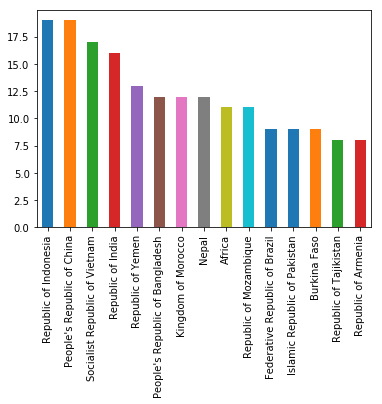

In [21]:
# we show number of projects per country as a bar graph for the top 15 countries
json_df['countryname'].value_counts().head(15).plot(kind='bar')


## Question 2 Solution:

Looking at the obtained dataframe using pd.read_json, we note that the column mjtheme_namecode is a dictionary and not really useful. We thus load json as a string, and use the normalize function shown above to create a dataframe that is useful.

In [45]:
# load json as string
json_string=json.load((open('data/world_bank_projects.json')))

#we use normalize on the columns of interest to get a observation for each unique occurence
# of a Theme Code, with a Theme Name, a country name and a project ID.
#since many projects have mroe than one theme, the total number of rows is more than the number of projects (500)

normalized_json=json_normalize(json_string, 'mjtheme_namecode', ['countryname','id'])
normalized_json.columns=['ThemeCode','ThemeName','CountryName','ProjectID']
normalized_json.head()


,ThemeCode,ThemeName,CountryName,ProjectID
0,8,Human development,Federal Democratic Republic of Ethiopia,P129828
1,11,,Federal Democratic Republic of Ethiopia,P129828
2,1,Economic management,Republic of Tunisia,P144674
3,6,Social protection and risk management,Republic of Tunisia,P144674
4,5,Trade and integration,Tuvalu,P145310


In [46]:
#we get the top 10 themes (before checking for invalid themes)
themes=normalized_json['ThemeName'].value_counts().head(10)
print(themes)
#note that the theme "" is in the top 10, This indicates that certain themes are missing

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: ThemeName, dtype: int64


## Question 3

In question 2 we noticed that the theme "" was in the top 10 themes. This indicated missing theme labels for some observations. In this question we check that the column ThemeCode is complete over all observations (i.e. there are no instances where the row has a missing or invalid ThemeCode), and fill the ThemeName column with the appropriate theme name.

In [49]:
# we check the values for ThemeCode are valid:
print(normalized_json['ThemeCode'].unique())
#we see that every row has a string that represents an integer in the set [1,11] (with 1 and 11 included)

['8' '11' '1' '6' '5' '2' '7' '4' '10' '9' '3']


In [50]:
#we get the top 10 themes by ThemeCode and compare to what we previously got:
themes=normalized_json['ThemeCode'].value_counts().head(10)
print(themes)
#note no empty themeCodes

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: ThemeCode, dtype: int64


## Pause:
From the above (and by comparing to results of questions 2) we can guess that ThemeCode 11 corresponds to "Environment and natural resources management" and that 10 corresponds to "Rural development". In what follows we look at a subset of the dataframe normalized_json, particularly the columns "ThemeCode" and "ThemeName", and find all occurences of the two columns, excluding those that include a "" in the ThemeName column.

In [51]:
#we import numpy to use replace empty strings with np.nan enabling us to use the function pd.dropna()
import numpy as np

#Subset normalized_json
CodesAndNames=normalized_json[['ThemeCode','ThemeName']]

#remove duplicate occurences
CodesAndNames=CodesAndNames.drop_duplicates(['ThemeCode','ThemeName'])

#replace empty strings in the themename with np.nan.
CodesAndNames['ThemeName'].replace('', np.nan, inplace=True)

#drop rows that include Nans
CodesAndNames=CodesAndNames.dropna()

print(CodesAndNames)
#notice that we have 11 unique valid project themes and a 1-1 correspondance between ThemeCode and ThemeName

    ThemeCode                                     ThemeName
0           8                             Human development
2           1                           Economic management
3           6         Social protection and risk management
4           5                         Trade and integration
5           2                      Public sector governance
6          11  Environment and natural resources management
8           7                   Social dev/gender/inclusion
11          4      Financial and private sector development
18         10                             Rural development
53          9                             Urban development
252         3                                   Rule of law


We now have a mapping between ThemeCodes and ThemeNames. We can now populate the ThemeName entry in every observation by applying this mapping to the ThemeCode in that entry. This is done below:

In [55]:
#create a copy of normalized_json:
fixed_json=normalized_json.copy()

#apply the mapping to every row using pd.apply with the mapping as input:
fixed_json['ThemeName']=fixed_json.apply(lambda row: CodesAndNames[CodesAndNames['ThemeCode']==row['ThemeCode']].iloc[0,1] if row['ThemeName']=="" else row["ThemeName"],axis=1)

fixed_json.head()
#we notice that ThemeName is not empty for index 1 anymore.

,ThemeCode,ThemeName,CountryName,ProjectID
0,8,Human development,Federal Democratic Republic of Ethiopia,P129828
1,11,Environment and natural resources management,Federal Democratic Republic of Ethiopia,P129828
2,1,Economic management,Republic of Tunisia,P144674
3,6,Social protection and risk management,Republic of Tunisia,P144674
4,5,Trade and integration,Tuvalu,P145310


In [16]:
# we check the top 10 themes by ThemeCode
themes_fixed=fixed_json['ThemeName'].value_counts().head(10)
print(themes_fixed)
#note no empty themeCodes

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: ThemeName, dtype: int64


## Question 3 Alternative Method:
In this solution, we do an inner join to add a new column to normalized_json that has the right ThemeName from
the CodesAndNames dataframe. we do that using pd.merge.

In [70]:
#AlternativeMethod:

#create a copy of CodesAndNames
CodesAndNames2=CodesAndNames.copy()

#create a copy of normalized_json:
fixed_json2=normalized_json.copy()

fixed_json2=fixed_json2.merge(CodesAndNames2,on="ThemeCode",suffixes=('_old','_fixed'))
print(fixed_json2.head())

#We See that the ThemeName_fixed column is now fixed:

,ThemeCode,ThemeName_old,CountryName,ProjectID,ThemeName_fixed
0,8,Human development,Federal Democratic Republic of Ethiopia,P129828,Human development
1,8,,People's Republic of China,P127033,Human development
2,8,Human development,Republic of Madagascar,P132616,Human development
3,8,Human development,Kingdom of Cambodia,P146271,Human development
4,8,Human development,Kingdom of Cambodia,P146271,Human development


In [75]:
#we print the top 10 ThemeNames
themes_fixed2=fixed_json2['ThemeName_fixed'].value_counts().head(10)
print(themes_fixed2)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: ThemeName_fixed, dtype: int64


In [79]:
#we check that we got the same solution in both our attempts for question 3:
print(themes_fixed2.equals(themes_fixed))

True


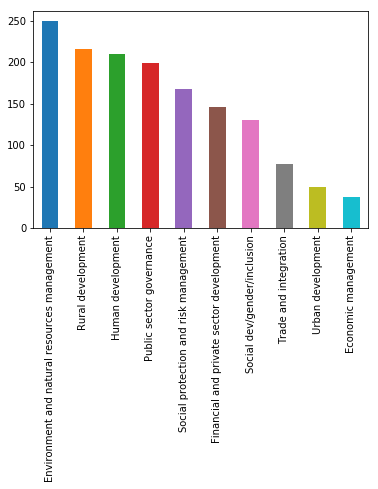

In [80]:
#for visualization purposes we also plot a bar graph for counts of ThemesNames:
themes_fixed2.plot(kind='bar')